<a href="https://colab.research.google.com/github/Caterpillar-T/MAT-421/blob/main/MAT_421_Homework_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MAT 421 Homework #7

Kyle Tucker

**Section 20.1: Numerical Differentiaion Problem Statement**

An evenly spaced set of points over the domain of a function that is over some interval is referred to as a numerical grid.

Python allows a function $f(x)$ to be represented over an interval by calculating a value on its relevent grid. Python comes equipped with methods to approximate the derivative of a functino over its numerical grid.

**Section 20.2: Finite Difference Approximating Derivatives**

The derivative is most commonly defined as $f'(a) = \lim_{x \rightarrow a}\frac{f(x)-f(a)}{x-a}$, at the point $x=a$ which is the slope at that point.

Using values of a function in the neighborhood of the point $x=a$ we can get approximations of the slope called finite difference approximations.

The forward difference estimates using the formula: $f'(x_j)=\frac{f(x_{j+1})-f(x_j)}{x_{j+1}-x_j}$.

The backward difference estimates using the formula: $f'(x_j)=\frac{f(x_{j})-f(x_{j-1})}{x_{j}-x_{j-1}}$.

Lastly, the central difference estimates using the formula: $f'(x_j)=\frac{f(x_{j+1})-f(x_{j-1})}{x_{j+1}-x_{j-1}}$.

Using this methods we will show an example below. We will compute the derivative of $\log x$.

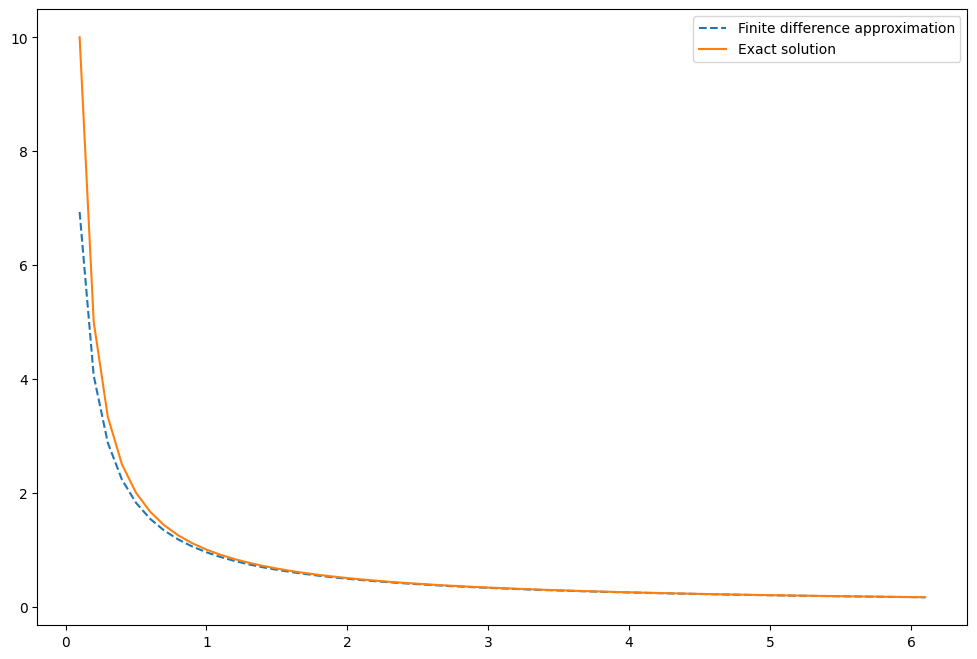

3.0685281944005487


In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# step size
h = 0.1
# define grid
x = np.arange(0.1, 2*np.pi, h)
# compute function
y = np.log(x)

# compute vector of forward differences
forward_diff = np.diff(y)/h
# compute corresponding grid
x_diff = x[:-1:]
# compute exact solution
exact_solution = 1/x_diff

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

# Compute max error between
# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

**Section 20.3: Approximating of Higher Order Differences**

Taylor series can be used to approximate higher order derivatives.

For instance $f(x_{j-1})=f(x_j)-hf'(x_j)+\frac{h^2f''(x_j)}{2}-\frac{h^3f'''(x_j)}{6}+...$ and $f(x_{j+1})=f(x_j)+hf'(x_j)+\frac{h^2f''(x_j)}{2}+\frac{h^3f'''(x_j)}{6}+...$.

And when these are added together we see $f(x_{j-1})+f(x_{j+1})=2f(x_j)+h^2f''(x_j)+\frac{h^4f''''(x_j)}{24}+...$. Which approximates to $f''(x_j)≈\frac{f(x_{j+1}) - 2f(x_j) = f(x_{j-1}}{h^2}$.

**Section 20.4: Numerical Differentiation with Noise**

Noise is not entirely unlike error, in the sense we say a data set may be contaminated with noise, we are truly saying the value computed is off by some small amount from what it should be due to our use of approximation over the true math fuction.

In Python there are ways to visuilize this noise.

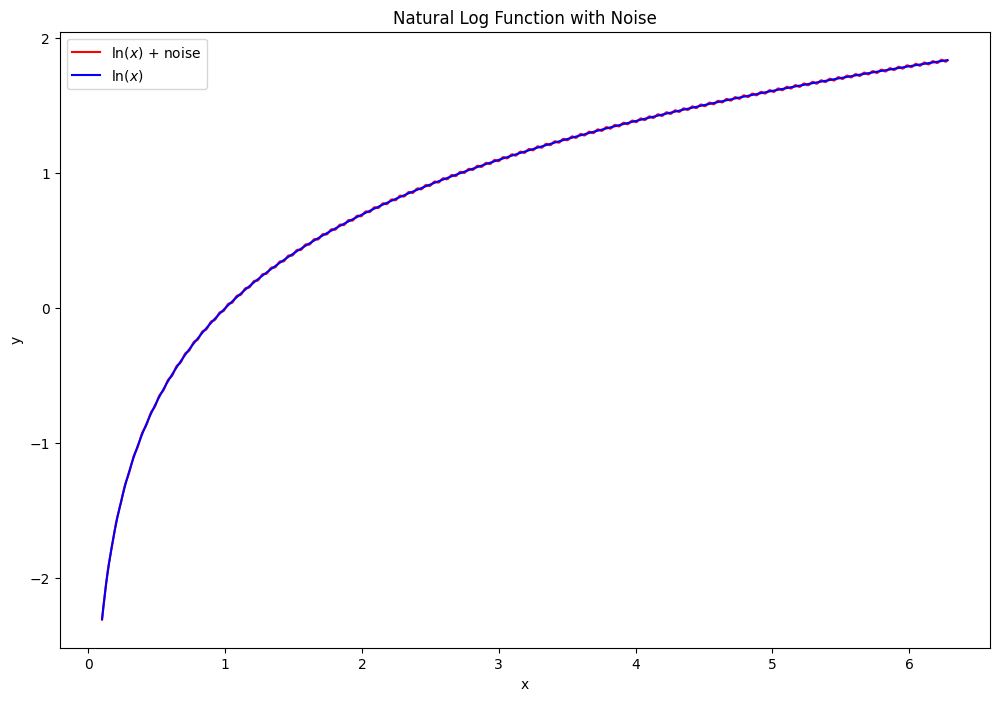

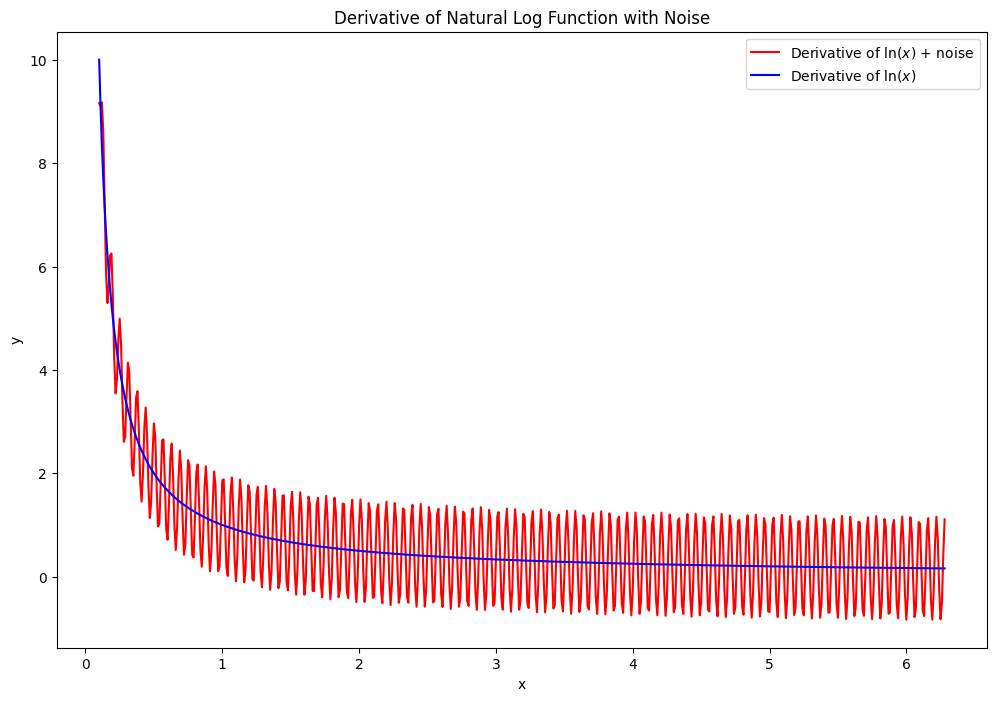

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define parameters
omega = 100  # Frequency of noise
epsilon = 0.01  # Amplitude of noise

# Define x values (starting from a small positive value to avoid ln(0))
x = np.arange(0.1, 2*np.pi, 0.01)

# Compute function values
y = np.log(x)
y_noise = y + epsilon * np.sin(omega * x)  # Adding sinusoidal noise

# Plot function and noisy version
plt.figure(figsize=(12, 8))
plt.plot(x, y_noise, 'r-', label=r'$\ln(x)$ + noise')
plt.plot(x, y, 'b-', label=r'$\ln(x)$')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Natural Log Function with Noise")
plt.show()

# Compute derivative and noisy derivative
y_derivative = 1 / x
y_derivative_noise = y_derivative + epsilon * omega * np.cos(omega * x)  # Noisy derivative

# Plot derivative and noisy derivative
plt.figure(figsize=(12, 8))
plt.plot(x, y_derivative_noise, 'r-', label=r'Derivative of $\ln(x)$ + noise')
plt.plot(x, y_derivative, 'b-', label=r'Derivative of $\ln(x)$')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Derivative of Natural Log Function with Noise")
plt.show()